用于处理输出结果

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

In [ ]:
from utils import SVC,PUK_kernel,numout2boolout,make_pipeline

SVC的结果分析

In [ ]:
X_masked=np.load("./processedData/X/X_masked.npy")
x_masked=np.load("./processedData/X/x_masked.npy")

In [ ]:
serieLabel = [[], [], [], []]
data=np.array()
SVC_PUK=np.load("./processedData/SVC_PUK.npy")
data=np.concatenate((data,SVC_PUK))
for j, C in enumerate(np.logspace(-10, 10, num=20)):
        serieLabel[0] += ["PUK"]*6
        serieLabel[1] += ["numY"]*3+["boolY"]*3
        serieLabel[2] += [C]*6
        serieLabel[3] += ["rec", "prec", "acc"]*2

SVC_sigmoid=np.load("./processedData/SVC_sigmoid.npy")
data=np.concatenate((data,SVC_sigmoid))
for j, C in enumerate(np.logspace(-10, 10, num=10)):
        serieLabel[0] += ["sigmoid"]*3
        serieLabel[1] += ["numY"]*3
        serieLabel[2] += [C]*3
        serieLabel[3] += ["rec", "prec", "acc"]

SVC_rbf=np.load("./processedData/SVC_rbf.npy")
data=np.concatenate((data,SVC_rbf))
for j, C in enumerate(np.logspace(-10, 10, num=10)):
        serieLabel[0] += ["rbf"]*3
        serieLabel[1] += ["numY"]*3
        serieLabel[2] += [C]*3
        serieLabel[3] += ["rec", "prec", "acc"]

series = pd.Series(data=SVC_PUK, index=serieLabel)

In [ ]:
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","numY",:,"rec"],label="recall-numY")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","numY",:,"prec"],label="precision-numY")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","numY",:,"acc"]+0.01,label="accuracy-numY")

plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","boolY",:,"rec"],label="recall-boolY")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","boolY",:,"prec"],label="precision-boolY")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","boolY",:,"acc"]-0.01,label="accuracy-boolY")

plt.legend()
plt.xlabel("lg C")
plt.ylabel("score")
plt.title("score of PUK")

In [ ]:
plt.plot(np.log10(np.logspace(-10, 10, num=10)),series["sigmoid","numY",:,"rec"],label="recall")
plt.plot(np.log10(np.logspace(-10, 10, num=10)),series["sigmoid","numY",:,"prec"],label="precision")
plt.plot(np.log10(np.logspace(-10, 10, num=10)),series["sigmoid","numY",:,"acc"],label="accuracy")
plt.legend()
plt.xlabel("lg C")
plt.ylabel("score")
plt.title("score of sigmoid")

In [ ]:
plt.plot(np.log10(np.logspace(-10, 10, num=10)),series["rbf","numY",:,"rec"],label="recall")
plt.plot(np.log10(np.logspace(-10, 10, num=10)),series["rbf","numY",:,"prec"],label="precision")
plt.plot(np.log10(np.logspace(-10, 10, num=10)),series["rbf","numY",:,"acc"],label="accuracy")
plt.legend()
plt.xlabel("lg C")
plt.ylabel("score")
plt.title("score of rbf")

用最佳参数在测试集上测试

In [ ]:
svcpuk= make_pipeline(StandardScaler(), SVC(C=10,kernel="rbf",class_weight="balanced"))
svcpuk.fit(X_masked,Y)
pred=numout2boolout(svcpuk.predict(x_masked))

print(confusion_matrix(numout2boolout(y),pred))
print(accuracy_score(numout2boolout(y),pred))
print(precision_score(numout2boolout(y),pred))
print(recall_score(numout2boolout(y),pred))

使用rbf核对bool化的y进行拟合

In [ ]:
svcrbf= make_pipeline(StandardScaler(), SVC(C=10,kernel="rbf",class_weight="balanced"))
svcrbf.fit(X_masked,Y)
pred=numout2boolout(svcpuk.predict(x_masked))

print(confusion_matrix(numout2boolout(y),pred))
print(accuracy_score(numout2boolout(y),pred))
print(precision_score(numout2boolout(y),pred))
print(recall_score(numout2boolout(y),pred))

线性回归的结果分析

Text(0.5, 1.0, 'score')

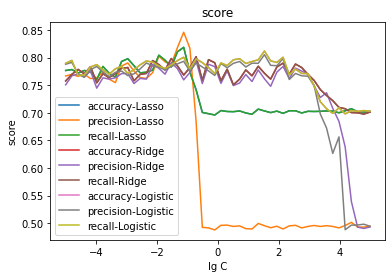

In [9]:
for model in ["Lasso","Ridge","Logistic"]:
    prec=[]
    acc=[]
    recall=[]
    with open("{}.out".format(model)) as f:
        for alpha in np.logspace(-5,5):
            f.readline()
            prec_cur=0
            acc_cur=0
            recall_cur=0
            for i in range(3):
                recall_cur+=float(f.readline().split('=')[-1])
                prec_cur+=float(f.readline().split('=')[-1])
                acc_cur+=float(f.readline().split('=')[-1])
                f.readline()
                f.readline()
                f.readline()
            recall.append(recall_cur/3)
            acc.append(acc_cur/3)
            prec.append(prec_cur/3)
    plt.plot(np.log10(np.logspace(-5,5)),acc,label="accuracy-{}".format(model))
    plt.plot(np.log10(np.logspace(-5,5)),prec,label="precision-{}".format(model))
    plt.plot(np.log10(np.logspace(-5,5)),recall,label="recall-{}".format(model))
plt.legend()
plt.xlabel("lg C")
plt.ylabel("score")
plt.title("score")

In [ ]:
ridge=Ridge(C=0.1,normalized=True)
ridge.fit(X_masked,Y)
pred=ridge.predict(x_masked)
ppred=ridge.predict(X_masked)

In [ ]:
plt.hist(pred,bins=40)
plt.xlabel("prediction")
plt.ylabel("number")
plt.title("distribution of prediction")

In [ ]:
plt.plot(np.linspace(2.25,3,num=1000),[precision_score(numout2boolout(y),pred>threshold) for threshold in np.linspace(2.25,3,num=1000)],label="test")
plt.plot(np.linspace(2.25,3,num=1000),[precision_score(numout2boolout(Y),ppred>threshold) for threshold in np.linspace(2.25,3,num=1000)],label="validation")
plt.xlabel("threshold")
plt.ylabel("precision")
plt.title("precision vs threshold")